In [53]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [54]:
scalar_code_results_file = "scalar_code_results.csv"
coyote_results_file = "coyote_results.csv"
egraph_greedy_trs_combined_results_file = "egraph_greedy_trs_combined_results.csv"
rewrite_rules_combined_results_file = "with_rewrite_rules_combined.csv"
egraph_simplification_results_file = "egraph_simplification_results.csv"

# generate graph to display compile times of chehab and coyote and take into account timeout : 
benchmarks = ["Box Blur 4 × 4", "Box Blur 8 × 8","Box Blur 16 × 16",
     "Dot Product 4", "Dot Product 8", "Dot Product 16", "Dot Product 32",
     "Hamm. Dist. 4", "Hamm. Dist. 8", "Hamm. Dist. 16", "Hamm. Dist. 32",
     "L2 Distance 4", "L2 Distance 8", "L2 Distance 16", "L2 Distance 32",
     "Linear Reg. 4", "Linear Reg. 8", "Linear Reg. 16", "Linear Reg. 32",
     "Poly. Reg. 4", "Poly. Reg. 8", "Poly. Reg. 16", "Poly. Reg. 32",
     "Gx 4 × 4", "Gx 8 × 8",
     "Gy 4 × 4", "Gy 8 × 8",
     "Rob. Cross 4 × 4", "Rob. Cross 8 × 8",
     "Mat. Mul. 4 × 4", "Mat. Mul. 8 × 8",
     "Max 3","Max 4","Max 5",
     "Sort 3","Sort 4",
     "Tree 50-50-5", "Tree 50-50-10", "Tree 100-50-5", "Tree 100-50-10", "Tree 100-100-5", "Tree 100-100-10"
]
########################################################################################################
Chehab_benchmarks_map = {
     "Box Blur 4 × 4" : "box_blur_4", "Box Blur 8 × 8" : "box_blur_8", "Box Blur 16 × 16" : "box_blur_16",

     "Dot Product 4" : "dot_product_4", "Dot Product 8" : "dot_product_8", 
     "Dot Product 16" : "dot_product_16", "Dot Product 32" : "dot_product_32",
     
     "Hamm. Dist. 4" : "hamming_dist_4" , "Hamm. Dist. 8" : "hamming_dist_8" , 
     "Hamm. Dist. 16" : "hamming_dist_16" , "Hamm. Dist. 32" : "hamming_dist_32" ,

     "L2 Distance 4" : "l2_distance_4" , "L2 Distance 8" : "l2_distance_8" , 
     "L2 Distance 16" : "l2_distance_16" , "L2 Distance 32" : "l2_distance_32" ,
     
     "Linear Reg. 4" : "lin_reg_4"  , "Linear Reg. 8" : "lin_reg_8" , 
     "Linear Reg. 16" : "lin_reg_16"  , "Linear Reg. 32" : "lin_reg_32" ,

     "Poly. Reg. 4" : "poly_reg_4", "Poly. Reg. 8" : "poly_reg_8", 
     "Poly. Reg. 16" : "poly_reg_16", "Poly. Reg. 32" : "poly_reg_32",

     "Gx 4 × 4" : "gx_kernel_4" , "Gx 8 × 8" : "gx_kernel_8",
     
     "Gy 4 × 4" : "gy_kernel_4", "Gy 8 × 8" : "gy_kernel_8",

     "Rob. Cross 4 × 4" : "roberts_cross_4", "Rob. Cross 8 × 8" : "roberts_cross_8",
     
     "Mat. Mul. 4 × 4" : "matrix_mul_4", "Mat. Mul. 8 × 8" : "matrix_mul_8",
     
     "Sort 3" : "sort_3", "Sort 4" : "sort_4",
     
     "Max 5" : "max_5", "Max 4" : "max_4", "Max 3" : "max_3",

     "Tree 50-50-5" : "tree_50-50-5" , "Tree 50-50-10" : "tree_50-50-10", 
     "Tree 100-50-5" : "tree_100-50-5", "Tree 100-50-10" : "tree_100-50-10", 
     "Tree 100-100-5" : "tree_100-100-5", "Tree 100-100-10" : "tree_100-100-10"
}
########################################################################################################
Coyote_benchmarks_map = {
     "Box Blur 4 × 4" : "box_blur_4x4", "Box Blur 8 × 8" : "box_blur_8x8", "Box Blur 16 × 16" : "box_blur_16x16",
     
     "Dot Product 4" : "dot_product_4x4_fully", "Dot Product 8" : "dot_product_8x8_fully", 
     "Dot Product 16" : "dot_product_16x16_fully", "Dot Product 32" : "dot_product_32x32_fully",
     
     "Hamm. Dist. 4" : "hamming_distance_4" , "Hamm. Dist. 8" : "hamming_distance_8" , 
     "Hamm. Dist. 16" : "hamming_distance_16" , "Hamm. Dist. 32" : "hamming_distance_32" ,

     "L2 Distance 4" : "l2_distance_4" , "L2 Distance 8" : "l2_distance_8" , 
     "L2 Distance 16" : "l2_distance_16" , "L2 Distance 32" : "l2_distance_32" ,
     
     "Linear Reg. 4" : "linear_reg_4"  , "Linear Reg. 8" : "linear_reg_8" , 
     "Linear Reg. 16" : "linear_reg_16"  , "Linear Reg. 32" : "linear_reg_32" ,

     "Poly. Reg. 4" : "poly_reg_4", "Poly. Reg. 8" : "poly_reg_8", 
     "Poly. Reg. 16" : "poly_reg_16", "Poly. Reg. 32" : "poly_reg_32",

     "Gx 4 × 4" : "gx_kernel_4x4" , "Gx 8 × 8" : "gx_kernel_8x8",
     
     "Gy 4 × 4" : "gy_kernel_4x4", "Gy 8 × 8" : "gy_kernel_8x8",

     "Rob. Cross 4 × 4" : "roberts_cross_4x4", "Rob. Cross 8 × 8" : "roberts_cross_8x8",
     
     "Mat. Mul. 4 × 4" : "matmul_4x4_fully", "Mat. Mul. 8 × 8" : "matmul_8x8_fully",
     
     "Sort 3" : "sort_3_packed_fully", "Sort 4" : "sort_4_packed_fully",
     
     "Max 5" : "max_5_packed_fully","Max 4" : "max_4_packed_fully", "Max 3" : "max_3_packed_fully",

     "Tree 50-50-5" : "tree_50-50-5" , "Tree 50-50-10" : "tree_50-50-10", 
     "Tree 100-50-5" : "tree_100-50-5", "Tree 100-50-10" : "tree_100-50-10", 
     "Tree 100-100-5" : "tree_100-100-5", "Tree 100-100-10" : "tree_100-100-10"
} 

In [55]:

def plot_histogram(benchmarks, times, labels, colors, timeout_value=7200):
    """
    Plots a histogram comparing compiling times across different metrics.

    Parameters:
    benchmarks (list): List of benchmark names.
    times (dict): Dictionary with metric names as keys and lists of compiling times as values.
    labels (list): List of metric names.
    colors (list): List of colors for each metric.
    timeout_value (int): The maximum value (e.g., timeout limit).
    """
    num_benchmarks = len(benchmarks)
    x = np.arange(num_benchmarks)
    width = 0.3

    fig, ax = plt.subplots(figsize=(24, 3))
    hatch_color = (0.6, 0.6, 0.6, 1.0)
    linewidth = 4.0

    for i, label in enumerate(labels):
        adjusted_times = [timeout_value if t == float('inf') else min(t, timeout_value) for t in times[label]]

        hatch_patterns = ['//' if t == timeout_value and original_t == float('inf') else ''
                          for t, original_t in zip(adjusted_times, times[label])]

        bars = ax.bar(x + i * width, adjusted_times, width, label=label, color=colors[i])

        for bar, hatch in zip(bars, hatch_patterns):
            if hatch:
                bar.set_hatch(hatch)
                bar._hatch_color = hatch_color
                bar._hatch_linewidth = linewidth

    # ax.set_title("Compiling Time Comparison")
    ax.set_xticks(x + width * (len(labels) / 2))
    ax.set_xticklabels(benchmarks, rotation=45, ha="right", fontsize=14)
    # ax.set_xlabel("Benchmarks", fontsize=16)
    ax.set_ylabel("Execution Time (s)", fontsize=16)

    bar = ax.bar(0, 0, color='none', hatch='//', edgecolor=hatch_color, label="N/A (Noise budget exhaustion)")
    bar._hatch_color = hatch_color
    bar._hatch_linewidth = linewidth

    ax.set_yscale("log")
    # ax.legend(fontsize=15)
    ax.legend(fontsize=15, loc="upper center", bbox_to_anchor=(0.30, 1.04), ncol=3)
    plt.xlim(-0.5, len(x) - 0.2)
    plt.ylim(0, 2*10**3)
    plt.grid(axis='y', linestyle="--", linewidth=0.5, which='major')

    plt.show()


/tmpdata/ipykernel_3158355/1846409306.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 2*10**3)


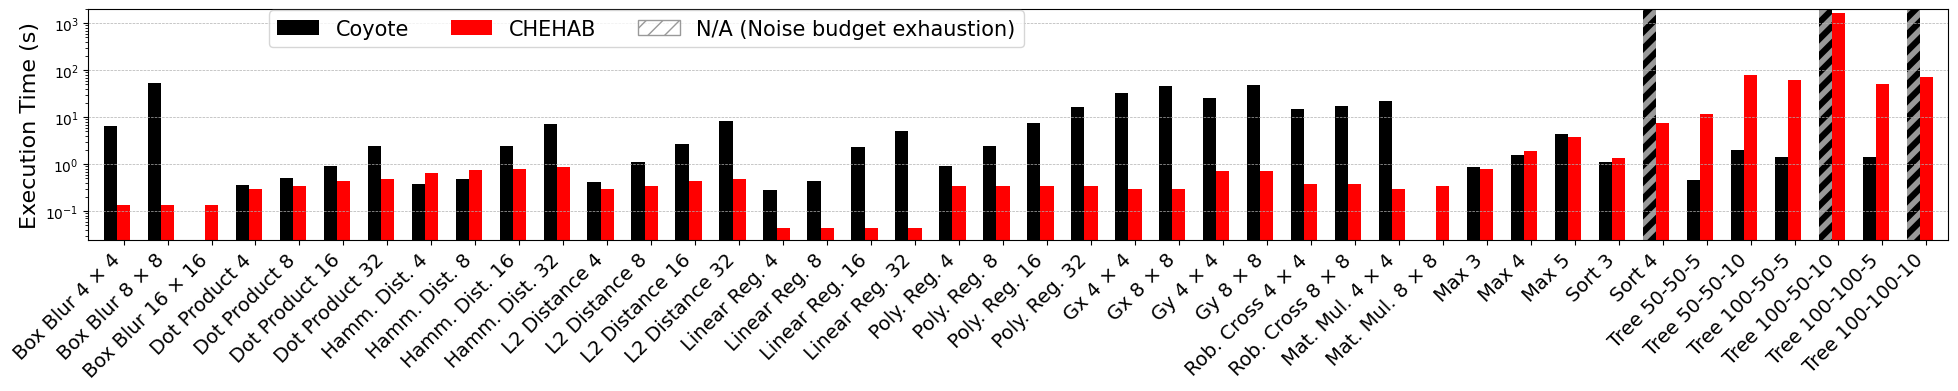

In [56]:

########################################################################################################
####################Load results #######################################################################
Chehab_rows = []
Coyote_rows = []
with open(egraph_greedy_trs_combined_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Chehab_rows = list(reader)
###########################################
with open(coyote_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Coyote_rows = list(reader)
#######################################################################################################
#######################################################################################################
Coyote_execution_times = []
Chehab_execution_times = []
for benchmark in benchmarks : 
     found = False
     for row in Chehab_rows :
          if row[0] ==  Chehab_benchmarks_map[benchmark] :
               if len(row) > 1 :
                    try : 
                         exec_time = float(row[10])
                    except : 
                         exec_time = float('inf') 
                    Chehab_execution_times.append(exec_time)
                    found= True
                    break
               else : 
                    break
     if not found : 
          Chehab_execution_times.append(0)
     #####################################################
     found = False
     for row in Coyote_rows :
          if row[0] ==  Coyote_benchmarks_map[benchmark] : 
               if len(row) > 1 :
                    try : 
                         exec_time = float(row[9])
                    except : 
                         exec_time = float('inf')
     
                    Coyote_execution_times.append(exec_time)
                    found= True
                    break
               else : 
                    break
     if not found : 
          Coyote_execution_times.append(0)

times = {
    "Coyote": np.array(Coyote_execution_times) , # execution time for Coyote
    "CHEHAB": np.array(Chehab_execution_times)  # execution time for CHEHAB
}
labels = [
    "Coyote",
    "CHEHAB"
]

colors = ['black', 'red']
plot_histogram(benchmarks, times, labels, colors)

In [57]:

def plot_histogram(benchmarks, times, labels, colors, timeout_value=7200):
    """
    Plots a histogram comparing compiling times across different metrics.

    Parameters:
    benchmarks (list): List of benchmark names.
    times (dict): Dictionary with metric names as keys and lists of compiling times as values.
    labels (list): List of metric names.
    colors (list): List of colors for each metric.
    timeout_value (int): The maximum value (e.g., timeout limit).
    """
    num_benchmarks = len(benchmarks)
    x = np.arange(num_benchmarks)
    width = 0.3

    fig, ax = plt.subplots(figsize=(24, 3))
    hatch_color = (0.6, 0.6, 0.6, 1.0)
    linewidth = 4.0

    for i, label in enumerate(labels):
        adjusted_times = [timeout_value if t == float('inf') else min(t, timeout_value) for t in times[label]]

        hatch_patterns = ['//' if t == timeout_value and original_t == float('inf') else ''
                          for t, original_t in zip(adjusted_times, times[label])]

        bars = ax.bar(x + i * width, adjusted_times, width, label=label, color=colors[i])

        for bar, hatch in zip(bars, hatch_patterns):
            if hatch:
                bar.set_hatch(hatch)
                bar._hatch_color = hatch_color
                bar._hatch_linewidth = linewidth

    # ax.set_title("Compiling Time Comparison")
    ax.set_xticks(x + width * (len(labels) / 2))
    ax.set_xticklabels(benchmarks, rotation=45, ha="right", fontsize=14)
    # ax.set_xlabel("Benchmarks", fontsize=16)
    ax.set_ylabel("Compile Time (s)", fontsize=16)

    bar = ax.bar(0, 0, color='none', hatch='//', edgecolor=hatch_color, label="Compilation Timeout")
    bar._hatch_color = hatch_color
    bar._hatch_linewidth = linewidth

    ax.set_yscale("log")
    # ax.legend(fontsize=15)
    ax.legend(fontsize=15, loc="upper center", bbox_to_anchor=(0.30, 1.04), ncol=3)
    plt.xlim(-0.5, len(x) - 0.2)
    plt.ylim(0, 2*10**3)
    plt.grid(axis='y', linestyle="--", linewidth=0.5, which='major')

    plt.show()


/tmpdata/ipykernel_3158355/3577442715.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 2*10**3)


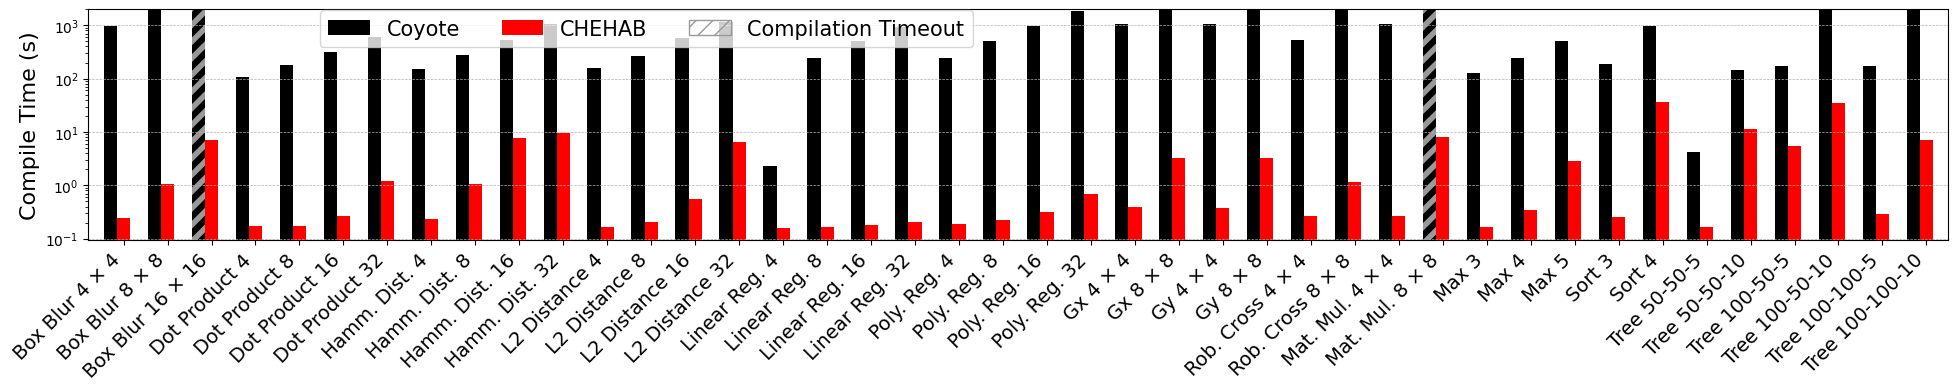

In [58]:

########################################################################################################
####################Load results #######################################################################
Chehab_rows = []
Coyote_rows = []
with open(egraph_greedy_trs_combined_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Chehab_rows = list(reader)
###########################################
with open(coyote_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Coyote_rows = list(reader)
#######################################################################################################
#######################################################################################################
Coyote_compile_times = []
Chehab_compile_times = []
for benchmark in benchmarks : 
     found = False
     for row in Chehab_rows :
          if row[0] ==  Chehab_benchmarks_map[benchmark] :
               if len(row) > 1 :
                    try : 
                         comp_time = float(row[9])
                    except : 
                         comp_time = float('inf') 
                    Chehab_compile_times.append(comp_time)
               else : 
                    Chehab_compile_times.append(float('inf'))
               found= True 
               break
     if not found : 
          Chehab_compile_times.append(0)## means benchmark results are lacking
     #####################################################
     found = False
     for row in Coyote_rows :
          if row[0] ==  Coyote_benchmarks_map[benchmark] : 
               if len(row) > 1 :
                    try : 
                         comp_time = float(row[8])
                    except : 
                         comp_time = float('inf')
     
                    Coyote_compile_times.append(comp_time)
               else : 
                    Coyote_compile_times.append(float('inf'))
               found= True
               break
     if not found : 
          Coyote_compile_times.append(0)

times = {
    "Coyote": np.array(Coyote_compile_times) , # execution time for Coyote
    "CHEHAB": np.array(Chehab_compile_times)  # execution time for CHEHAB
}
labels = [
    "Coyote",
    "CHEHAB"
]

colors = ['black', 'red']
plot_histogram(benchmarks, times, labels, colors)


In [59]:

def plot_histogram(benchmarks, times, labels, colors, timeout_value=7200):
    """
    Plots a histogram comparing compiling times across different metrics.

    Parameters:
    benchmarks (list): List of benchmark names.
    times (dict): Dictionary with metric names as keys and lists of compiling times as values.
    labels (list): List of metric names.
    colors (list): List of colors for each metric.
    timeout_value (int): The maximum value (e.g., timeout limit).
    """
    num_benchmarks = len(benchmarks)
    x = np.arange(num_benchmarks)
    width = 0.3

    fig, ax = plt.subplots(figsize=(24, 3))
    hatch_color = (0.6, 0.6, 0.6, 1.0)
    linewidth = 4.0

    for i, label in enumerate(labels):
        adjusted_times = [timeout_value if t == float('inf') else min(t, timeout_value) for t in times[label]]

        hatch_patterns = ['//' if t == timeout_value and original_t == float('inf') else ''
                          for t, original_t in zip(adjusted_times, times[label])]

        bars = ax.bar(x + i * width, adjusted_times, width, label=label, color=colors[i])

        for bar, hatch in zip(bars, hatch_patterns):
            if hatch:
                bar.set_hatch(hatch)
                bar._hatch_color = hatch_color
                bar._hatch_linewidth = linewidth

    # ax.set_title("Compiling Time Comparison")
    ax.set_xticks(x + width * (len(labels) / 2))
    ax.set_xticklabels(benchmarks, rotation=45, ha="right", fontsize=14)
    # ax.set_xlabel("Benchmarks", fontsize=16)
    ax.set_ylabel("Compile Time (s)", fontsize=16)

    bar = ax.bar(0, 0, color='none', hatch='//', edgecolor=hatch_color, label="Compilation Timeout")
    bar._hatch_color = hatch_color
    bar._hatch_linewidth = linewidth

    ax.set_yscale("log")
    # ax.legend(fontsize=15)
    ax.legend(fontsize=15, loc="upper center", bbox_to_anchor=(0.30, 1.04), ncol=3)
    plt.xlim(-0.5, len(x) - 0.2)
    plt.ylim(0, 2*10**3)
    plt.grid(axis='y', linestyle="--", linewidth=0.5, which='major')

    plt.show()


/tmpdata/ipykernel_3158355/3577442715.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 2*10**3)


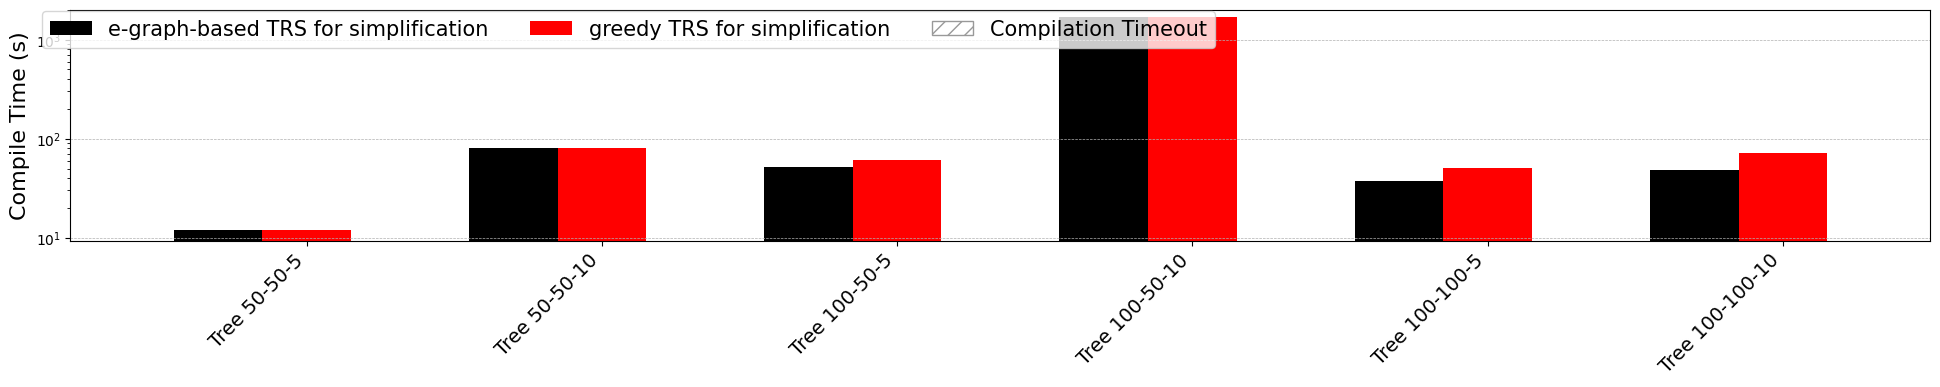

In [63]:

########################################################################################################
####################Load results #######################################################################
Greedy_trs_Chehab_rows = []
egraph_simplification_Chehab_rows = []
with open(egraph_greedy_trs_combined_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Greedy_trs_Chehab_rows = list(reader)
###########################################
with open(egraph_simplification_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        egraph_simplification_Chehab_rows = list(reader)
#######################################################################################################
#######################################################################################################
egraph_simplication_Chehab_compile_times = []
Greedy_trs_Chehab_compile_times = []
for benchmark in benchmarks : 
     found = False
     for row in Greedy_trs_Chehab_rows :
          if row[0] ==  Chehab_benchmarks_map[benchmark] :
               if len(row) > 1 :
                    try : 
                         comp_time = float(row[10])
                    except : 
                         comp_time = float('inf') 
                    Greedy_trs_Chehab_compile_times.append(comp_time)
               else : 
                    Greedy_trs_Chehab_compile_times.append(float('inf'))
               found= True 
               break
     if not found : 
          Greedy_trs_Chehab_compile_times.append(0)## means benchmark results are lacking
     #####################################################
     found = False
     for row in egraph_simplification_Chehab_rows :
          if row[0] ==  Chehab_benchmarks_map[benchmark] : 
               if len(row) > 1 :
                    try : 
                         comp_time = float(row[10])
                    except : 
                         comp_time = float('inf')
     
                    egraph_simplication_Chehab_compile_times.append(comp_time)
               else : 
                    egraph_simplication_Chehab_compile_times.append(float('inf'))
               found= True
               break
     if not found : 
          egraph_simplication_Chehab_compile_times.append(0)

labels = [
    "e-graph-based TRS for simplification",
    "greedy TRS for simplification"
]
times = {
    "e-graph-based TRS for simplification": np.array(egraph_simplication_Chehab_compile_times) , # execution time for Coyote
    "greedy TRS for simplification": np.array(Greedy_trs_Chehab_compile_times)  # execution time for CHEHAB
}

colors = ['black', 'red']
plot_histogram(benchmarks, times, labels, colors)


/tmpdata/ipykernel_3158355/3577442715.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 2*10**3)


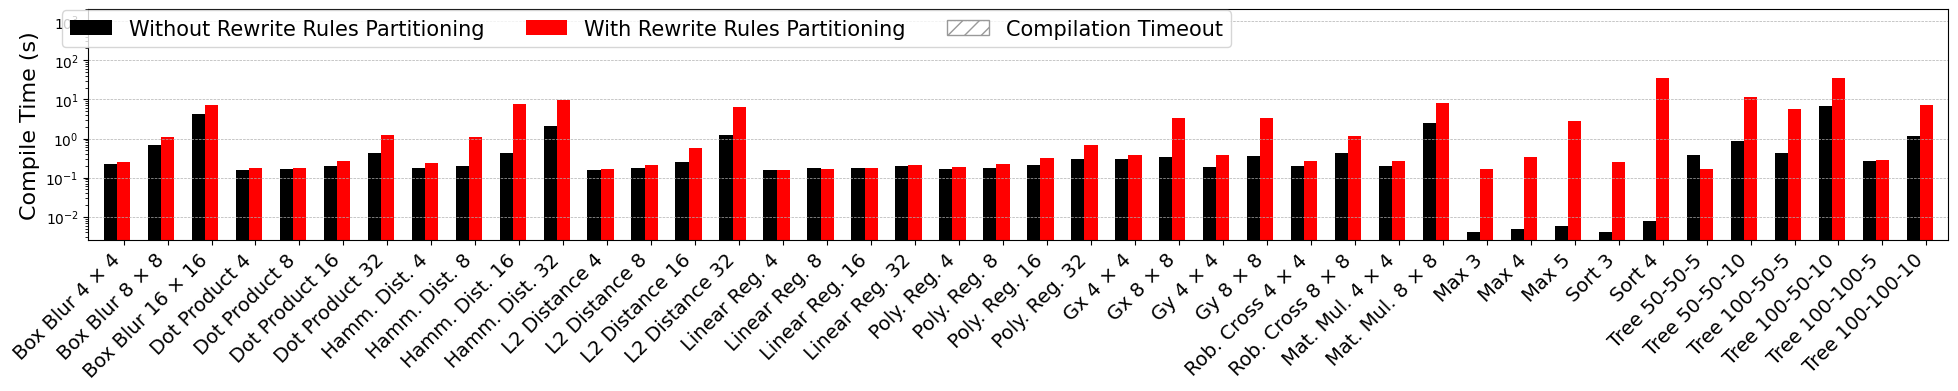

In [61]:

########################################################################################################
####################Load results #######################################################################
Greedy_trs_Chehab_rows = []
rewrite_rules_combined_Chehab_rows = []
with open(egraph_greedy_trs_combined_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Greedy_trs_Chehab_rows = list(reader)
###########################################
with open(rewrite_rules_combined_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        rewrite_rules_combined_Chehab_rows = list(reader)
#######################################################################################################
#######################################################################################################
rewrite_rules_combined_Chehab_compile_times = []
Greedy_trs_Chehab_compile_times = []
for benchmark in benchmarks : 
     found = False
     for row in Chehab_rows :
          if row[0] ==  Chehab_benchmarks_map[benchmark] :
               if len(row) > 1 :
                    try : 
                         comp_time = float(row[9])
                    except : 
                         comp_time = float('inf') 
                    Greedy_trs_Chehab_compile_times.append(comp_time)
               else : 
                    Greedy_trs_Chehab_compile_times.append(float('inf'))
               found= True 
               break
     if not found : 
          Greedy_trs_Chehab_compile_times.append(0)## means benchmark results are lacking
     #####################################################
     found = False
     for row in  rewrite_rules_combined_Chehab_rows:
          if row[0] ==  Chehab_benchmarks_map[benchmark] : 
               if len(row) > 1 :
                    try : 
                         comp_time = float(row[9])
                    except : 
                         comp_time = float('inf')
     
                    rewrite_rules_combined_Chehab_compile_times.append(comp_time)
               else : 
                    rewrite_rules_combined_Chehab_compile_times.append(float('inf'))
               found= True
               break
     if not found : 
          rewrite_rules_combined_Chehab_compile_times.append(0)

labels = [
    "Without Rewrite Rules Partitioning",
    "With Rewrite Rules Partitioning"
]
times = {
    "Without Rewrite Rules Partitioning": np.array(rewrite_rules_combined_Chehab_compile_times) , # execution time for Coyote
    "With Rewrite Rules Partitioning": np.array(Greedy_trs_Chehab_compile_times)  # execution time for CHEHAB
}

colors = ['black', 'red']
plot_histogram(benchmarks, times, labels, colors)


In [62]:
########################### Generate Latex code ###########################################
table_header = """
\\begin{tabular}{l|cccccc|cccccc:c|cccccc:c}
        \\hline
        \\multirow{2}*{Kernel}
        & \\multicolumn{6}{c|}{Initial}
        & \\multicolumn{7}{c|}{CHEHAB}
        & \\multicolumn{7}{c}{Coyote}  \\\\
        {}
        &  $\\cup$ &     $\\cup^\\otimes$  & $\\otimes$ &     $\\circlearrowright$  & $\\odot$ & $\\oplus$
        &  $\\cup$ & \\h{$\\cup^\\otimes$}  & $\\otimes$ & \\h{$\\circlearrowright$} & $\\odot$ & $\\oplus$ &  \\h{CT}
        &  $\\cup$ & \\h{$\\cup^\\otimes$}  & $\\otimes$ & \\h{$\\circlearrowright$} & $\\odot$ & $\\oplus$ &  \\h{CT}
        \\\\ \\hline
"""
table_bottom = """
   \\hline
    \\end{tabular}
"""
table_body = ""
benchmark_types_separator = "\\hdashline"
benchmark_instances_separator = "\\\\"

benchmarks_families = [
     ["Box Blur 4 × 4", "Box Blur 8 × 8","Box Blur 16 × 16"],
     ["Dot Product 4", "Dot Product 8", "Dot Product 16", "Dot Product 32"],
     ["Hamm. Dist. 4", "Hamm. Dist. 8", "Hamm. Dist. 16", "Hamm. Dist. 32"],
     ["L2 Distance 4", "L2 Distance 8", "L2 Distance 16", "L2 Distance 32"],
     ["Linear Reg. 4", "Linear Reg. 8", "Linear Reg. 16", "Linear Reg. 32"],
     ["Poly. Reg. 4", "Poly. Reg. 8", "Poly. Reg. 16", "Poly. Reg. 32"],
     ["Gx 4 × 4", "Gx 8 × 8"],
     ["Gy 4 × 4", "Gy 8 × 8"],
     ["Rob. Cross 4 × 4", "Rob. Cross 8 × 8"],
     ["Mat. Mul. 4 × 4", "Mat. Mul. 8 × 8"],
     ["Max 3","Max 4","Max 5"],
     ["Sort 3","Sort 4"],
     ["Tree 50-50-5", "Tree 50-50-10", "Tree 100-50-5", "Tree 100-50-10", "Tree 100-100-5", "Tree 100-100-10"]
]
#################### Read results of Chehab Coyote , Scalar code ###########################
Chehab_rows = []
Coyote_rows = []
Scalar_code_rows = []
with open(egraph_greedy_trs_combined_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Chehab_rows = list(reader)
###########################################
with open(coyote_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Coyote_rows = list(reader)
###########################################
with open(scalar_code_results_file, mode='r', newline='') as infile:
        reader = csv.reader(infile)
        headers = next(reader)
        Scalar_code_rows = list(reader)
############################################################################################
for index,benchmarks in enumerate(benchmarks_families) :
     for benchmark in benchmarks : 
          Chehab_row=""
          Coyote_row=""
          Scalar_row=""
          found = False
          for row in Chehab_rows :
               if row[0] ==  Chehab_benchmarks_map[benchmark] :
                    Chehab_row=row
                    found = True
                    break
          if not found : 
              Chehab_row=["??"]*11
          #####################################################
          found = False
          for row in Scalar_code_rows :
               if row[0] ==  Chehab_benchmarks_map[benchmark] :
                    Scalar_row=row
                    found = True
                    break
          if not found : 
              Scalar_row=["??"]*11
          #####################################################
          found = False
          for row in Coyote_rows :
               if row[0] ==  Coyote_benchmarks_map[benchmark] :
                    Coyote_row=row
                    found = True
                    break
          if not found : 
              Coyote_row=["??"]*10
          if len(Chehab_row) == 1 :
               Chehab_row = Chehab_row + ["-"]*10
          if len(Coyote_row) == 1 :
               Coyote_row = Coyote_row + ["-"]*10
          chehab_order = {"depth":7,"mul_depth":8,"mul":6,"rotation":4,"plain_mul":3,"add":1}
          coyote_order = {"depth":6,"mul_depth":7,"mul":5,"rotation":4,"plain_mul":3,"add":1}
          #print(f"{Scalar_row}")
          #print(f"{Chehab_row}")
          #print(f"{Coyote_row}")
          table_row = (
            f"{benchmark}&{Scalar_row[7]}&{Scalar_row[8]}&{Scalar_row[6]}&{Scalar_row[4]}&{Scalar_row[3]}&{Scalar_row[1]}&"
            f"{Chehab_row[7]}&{Chehab_row[8]}&{Chehab_row[6]}&{Chehab_row[4]}&{Chehab_row[3]}&{Chehab_row[1]}&{Chehab_row[9]}&"
            f"{Coyote_row[6]}&{Coyote_row[7]}&{Coyote_row[5]}&{Coyote_row[4]}&{Coyote_row[3]}&{Coyote_row[1]}&{Coyote_row[8]}"
            + benchmark_instances_separator + "\n"
          )
          table_body=table_body+table_row
     if index != len(benchmarks_families) - 1 :
          table_body+=benchmark_types_separator+"\n"
result = table_header + table_body + table_bottom
print(result)
     







\begin{tabular}{l|cccccc|cccccc:c|cccccc:c}
        \hline
        \multirow{2}*{Kernel}
        & \multicolumn{6}{c|}{Initial}
        & \multicolumn{7}{c|}{CHEHAB}
        & \multicolumn{7}{c}{Coyote}  \\
        {}
        &  $\cup$ &     $\cup^\otimes$  & $\otimes$ &     $\circlearrowright$  & $\odot$ & $\oplus$
        &  $\cup$ & \h{$\cup^\otimes$}  & $\otimes$ & \h{$\circlearrowright$} & $\odot$ & $\oplus$ &  \h{CT}
        &  $\cup$ & \h{$\cup^\otimes$}  & $\otimes$ & \h{$\circlearrowright$} & $\odot$ & $\oplus$ &  \h{CT}
        \\ \hline
Box Blur 4 × 4&8&0&0&0&0&84&5&0&0&1&0&5&0.247&36&0&0&49&111&26&953.751\\
Box Blur 8 × 8&8&0&0&0&0&420&5&0&0&1&0&5&1.070&37&0&0&348&616&27&4812.447\\
Box Blur 16 × 16&8&0&0&0&0&1860&5&0&0&1&0&5&7.177&-&-&-&-&-&-&-\\
\hdashline
Dot Product 4&4&1&4&0&0&3&4&1&1&3&0&3&0.176&5&1&1&2&0&2&105.841\\
Dot Product 8&8&1&8&0&0&7&6&1&1&4&0&4&0.174&10&1&1&3&6&7&177.188\\
Dot Product 16&16&1&16&0&0&15&7&1&1&6&0&6&0.263&16&1&1&10&19&11&320.297\\
Dot Product 